# Аннотация

Данный проект выполнен **Бугаевым Егором Петровичем**, студентом группы БПМИИ 215 Факультета Компьютерных Наук НИУ ВШЭ в рамках курсовой работы на 2м курсе. 

Руководителем проекта выступил **Попов Виктор Юрьевич**: Доктор физико-математических наук, заведующий лабораторией моделирования и управления сложными системами факультета компьютерных наук НИУ ВШЭ

# Подготовка данных. Первые зарисовки. Очистка данных.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
data = pd.read_csv('gdrive/MyDrive/Colab Notebooks/AAA/earthquakes.csv')
plates = pd.read_csv('gdrive/MyDrive/Colab Notebooks/AAA/plates.csv')

Очистим данные, убрав все строки, где отсуствуют координаты (они нам совсем бесполезны, так как все рассуждениям основываются на локации).

In [5]:
data = data[data['Latitude'].notna()]
data = data[data['Longitude'].notna()]

In [6]:
plates = plates[plates['lat'].notna()]
plates = plates[plates['lon'].notna()]

In [7]:
data.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",31.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,35.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.400,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-1566.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL: ARIHA (JERICHO),31.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Оставляем только интересные для данного исследования значения

In [9]:
data = data[['Location Name', 'Latitude', 'Longitude', 'Mag']]

In [8]:
plates.head()

,plate,lat,lon
0,am,30.754,132.824
1,am,30.970,132.965
2,am,31.216,133.197
3,am,31.515,133.500
4,am,31.882,134.042


In [ ]:
fig = go.Figure(go.Scattermapbox(lat=data['Latitude'], \
                                 lon=data['Longitude'], \
                                 text=data['Location Name']))

map_center = go.layout.mapbox.Center()

fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=1), width=1280, height=720)
fig.show()

In [ ]:
fig = go.Figure()

plate_names = list(plates["plate"].unique())
show_legend = True
for name in plate_names:
    this_plate = plates[plates["plate"] == name]
    ind_pairs = []
    start = 0
    for i in range(1, this_plate.shape[0]):
        if abs(this_plate.iloc[i]['lon'] - this_plate.iloc[i - 1]['lon']) > 250 \
            or abs(this_plate.iloc[i]['lat'] - this_plate.iloc[i - 1]['lat']) > 250:
          ind_pairs.append([start, i])
          start = i

    ind_pairs.append([start, this_plate.shape[0]])

    for p in ind_pairs:
      if p[1] - p[0] < 2:
          continue
    
      fig.add_trace(go.Scattermapbox(lat=this_plate.iloc[p[0]:p[1]]['lat'],
                                      showlegend=show_legend,
                                      lon=this_plate.iloc[p[0]:p[1]]['lon'], 
                                      text=this_plate.iloc[p[0]:p[1]]['plate'], 
                                      opacity=0.5,
                                      mode='lines',
                                      line=plotly.graph_objects.scattermapbox.Line(width=3),
                                      line_color='black',
                                      name="Tectonic plates boundaries"))
      show_legend = False

map_center = go.layout.mapbox.Center()
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center), width=1280, height=720)
fig.show()

Наложим графики один на другой:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scattermapbox(lat=data['Latitude'], 
                               lon=data['Longitude'], 
                               text=data['Location Name'], 
                               fillcolor='Blue', 
                               name="Earthquakes locations"))

plate_names = list(plates["plate"].unique())
show_legend = True
for name in plate_names:
    this_plate = plates[plates["plate"] == name]
    ind_pairs = []
    start = 0
    for i in range(1, this_plate.shape[0]):
        if abs(this_plate.iloc[i]['lon'] - this_plate.iloc[i - 1]['lon']) > 250 \
            or abs(this_plate.iloc[i]['lat'] - this_plate.iloc[i - 1]['lat']) > 250:
          ind_pairs.append([start, i])
          start = i

    ind_pairs.append([start, this_plate.shape[0]])

    for p in ind_pairs:
      if p[1] - p[0] < 2:
          continue
    
      fig.add_trace(go.Scattermapbox(lat=this_plate.iloc[p[0]:p[1]]['lat'],
                                      showlegend=show_legend,
                                      lon=this_plate.iloc[p[0]:p[1]]['lon'], 
                                      text=this_plate.iloc[p[0]:p[1]]['plate'], 
                                      opacity=0.5,
                                      mode='lines',
                                      line=plotly.graph_objects.scattermapbox.Line(width=3),
                                      line_color='black',
                                      name="Tectonic plates boundaries"))
      show_legend = False

map_center = go.layout.mapbox.Center()
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=1), width=1280, height=720)
fig.show()

In [ ]:
fig = go.Figure()

data_mag = data[data['Mag'].notna()]
fig.add_trace(go.Scattermapbox(lat=data_mag['Latitude'], 
                               lon=data_mag['Longitude'], 
                               text=data_mag['Location Name'], 
                               marker=dict(colorbar=dict(title="Magnitude"),
                                             color=data_mag['Mag']), 
                               name="Magnitude"))

plate_names = list(plates["plate"].unique())
show_legend = True
for name in plate_names:
    this_plate = plates[plates["plate"] == name]
    ind_pairs = []
    start = 0
    for i in range(1, this_plate.shape[0]):
        if abs(this_plate.iloc[i]['lon'] - this_plate.iloc[i - 1]['lon']) > 250 \
            or abs(this_plate.iloc[i]['lat'] - this_plate.iloc[i - 1]['lat']) > 250:
          ind_pairs.append([start, i])
          start = i

    ind_pairs.append([start, this_plate.shape[0]])

    for p in ind_pairs:
      if p[1] - p[0] < 2:
          continue
    
      fig.add_trace(go.Scattermapbox(lat=this_plate.iloc[p[0]:p[1]]['lat'],
                                      showlegend=show_legend,
                                      lon=this_plate.iloc[p[0]:p[1]]['lon'], 
                                      text=this_plate.iloc[p[0]:p[1]]['plate'], 
                                      opacity=0.5,
                                      mode='lines',
                                      line=plotly.graph_objects.scattermapbox.Line(width=3),
                                      line_color='black',
                                      name="Tectonic plates boundaries"))
      show_legend = False

map_center = go.layout.mapbox.Center()

fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=1), width=1280, height=720)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

По этой карте уже видно, что значительная часть сильных землятресений проходит на стыке восточной границе Евразийской плиты, Тихоокеанской плиты и Северо-американской, а так же в расположенном рядом районе Филлипинской плиты. На южной границе Евразийской плиты земелетрясения тоже частое явление, однако, как можно заметить по графику, их средняя магнитуда значительно меньше. Дальше попробуем кластеризовать наши землетрясения и подтвердить это заключение математической статистикой.

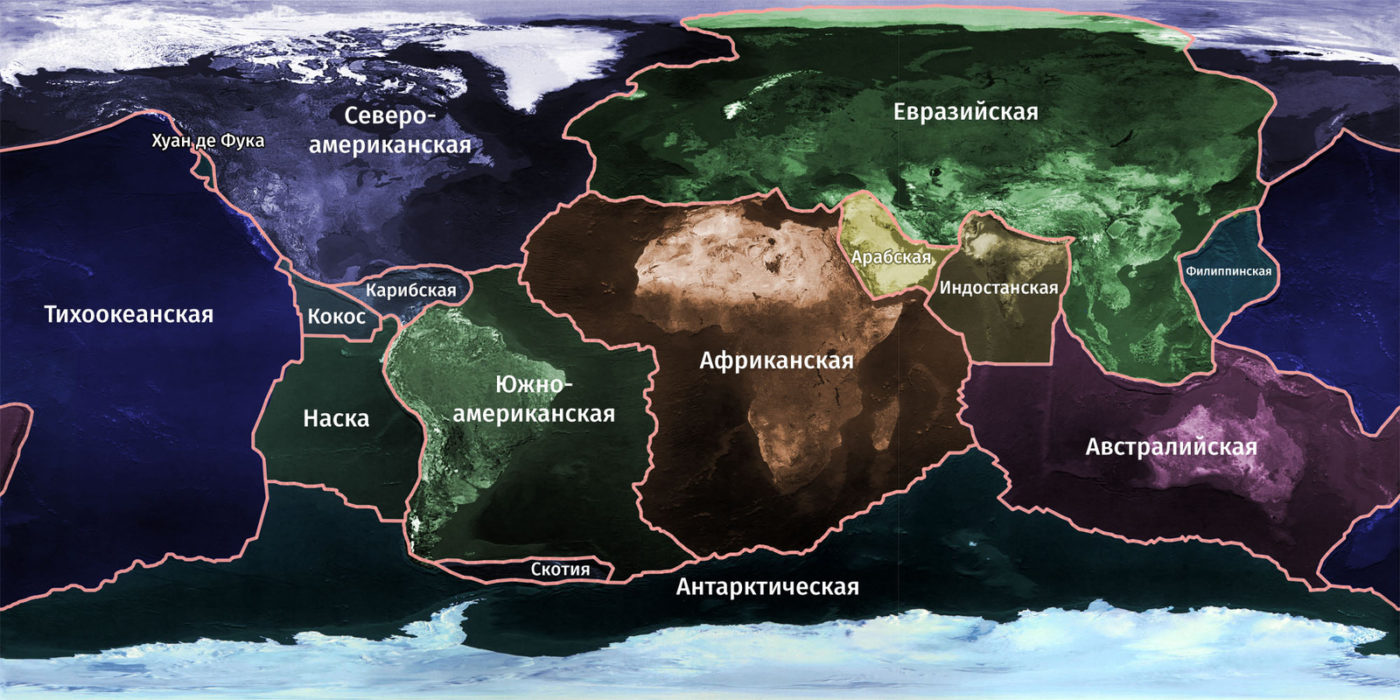

Заметим, что мы все еще учитываем значительное количество землетрясений, которые произошли вдали от тектонических плит. Давайти избавимся от них, применив алгоритм DBSCAN (подробнее про него будет ниже в Части 2). 

Этот алгоритм хорошо выделяет длинные скучкованные кластера. Для того, чтобы оставить только точки вдоль линий тектонических разломов, очистим данные следующим образом. 

Добавим точки вдоль линий разломов (датасет plates) в наш датасет data. Затем проведем кластеризацию с помощью метода DBSCAN, при этом точки вдоль тектонических плит выступают в роли связующих элементов для кластеров вдоль тектонических плит. Это позволит нам выделить один кластер землятресений вдоль разломов. Все не попавшие в него землетрясения откинем (они удаленны от границ плит и нас не интересуют).

DBNOSCAN концентрирует кластера вокруг скоплений точек вблизи друг друга. Добавим границы тектонических плит в датасет несколько раз, тем самым они будут более явными ориентирами для алгоритма и позволят лучше сконцентрировать землятресения вокруг них.

Параметры для запуска DBSCAN подбираем вручную. Параметр min_samples отвечает за минимальное количество точек, которые должны находиться близко друг к другу, чтобы образовать отдельный кластер (близость определяется параметром eps). 

Выставляем параметр 15 для минимального количества точек, необходимых для образования кластера. При этом точки на границах добавляем чуть меньше раз, тем самым это почти достаточно для формирования кластера, но не совсем - все еще нужны землятресения рядом.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
data_for_clusters = data[['Latitude', 'Longitude']]
plates_for_clusters = plates.drop('plate', axis=1)
for i in range(5):
    total_clusters = pd.concat([data_for_clusters, plates_for_clusters.rename(columns={'lat':'Latitude', 'lon': 'Longitude'})])

kmeans = DBSCAN(eps=2, min_samples=15).fit(total_clusters) 
data['db_clear_label'] = kmeans.labels_[:data_for_clusters.shape[0]]

In [ ]:
fig = go.Figure()
clusters = list(data['db_clear_label'].unique())
for cluster in clusters:
  data_cluster = data[data['db_clear_label'] == cluster]
  

  fig.add_trace(go.Scattermapbox(lat=data_cluster['Latitude'], 
                                lon=data_cluster['Longitude'], 
                                text=data_cluster['Location Name'], 
                                marker=dict(color=cluster), 
                                name="Cluster " + str(cluster)))

plate_names = list(plates["plate"].unique())
show_legend = True
for name in plate_names:
    this_plate = plates[plates["plate"] == name]
    ind_pairs = []
    start = 0
    for i in range(1, this_plate.shape[0]):
        if abs(this_plate.iloc[i]['lon'] - this_plate.iloc[i - 1]['lon']) > 250 \
            or abs(this_plate.iloc[i]['lat'] - this_plate.iloc[i - 1]['lat']) > 250:
          ind_pairs.append([start, i])
          start = i

    ind_pairs.append([start, this_plate.shape[0]])

    for p in ind_pairs:
      if p[1] - p[0] < 2:
          continue
    
      fig.add_trace(go.Scattermapbox(lat=this_plate.iloc[p[0]:p[1]]['lat'],
                                      showlegend=show_legend,
                                      lon=this_plate.iloc[p[0]:p[1]]['lon'], 
                                      text=this_plate.iloc[p[0]:p[1]]['plate'], 
                                      opacity=0.5,
                                      mode='lines',
                                      line=plotly.graph_objects.scattermapbox.Line(width=3),
                                      line_color='black',
                                      name="Tectonic plates boundaries"))
      show_legend = False

map_center = go.layout.mapbox.Center()

fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=1), width=1280, height=720)
fig.show()

Действительно, замечаем, что большая часть точек на сильном удалении от границ попала в кластер -1 (то есть ни в какой кластер). Удалим эти точки из набора данных.

In [ ]:
data = data[data['db_clear_label'] != -1]
data = data.drop('db_clear_label', axis=1)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scattermapbox(lat=data['Latitude'], 
                               lon=data['Longitude'], 
                               text=data['Location Name'], 
                               fillcolor='Blue', 
                               name="Earthquakes locations"))

plate_names = list(plates["plate"].unique())
show_legend = True
for name in plate_names:
    this_plate = plates[plates["plate"] == name]
    ind_pairs = []
    start = 0
    for i in range(1, this_plate.shape[0]):
        if abs(this_plate.iloc[i]['lon'] - this_plate.iloc[i - 1]['lon']) > 250 \
            or abs(this_plate.iloc[i]['lat'] - this_plate.iloc[i - 1]['lat']) > 250:
          ind_pairs.append([start, i])
          start = i

    ind_pairs.append([start, this_plate.shape[0]])

    for p in ind_pairs:
      if p[1] - p[0] < 2:
          continue
    
      fig.add_trace(go.Scattermapbox(lat=this_plate.iloc[p[0]:p[1]]['lat'],
                                      showlegend=show_legend,
                                      lon=this_plate.iloc[p[0]:p[1]]['lon'], 
                                      text=this_plate.iloc[p[0]:p[1]]['plate'], 
                                      opacity=0.5,
                                      mode='lines',
                                      line=plotly.graph_objects.scattermapbox.Line(width=3),
                                      line_color='black',
                                      name="Tectonic plates boundaries"))
      show_legend = False

map_center = go.layout.mapbox.Center()
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=1), width=1280, height=720)
fig.show()